In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [108]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [109]:
init_notebook_mode(connected=True)
cf.go_offline()

In [110]:
df=pd.read_csv('CAR.csv')

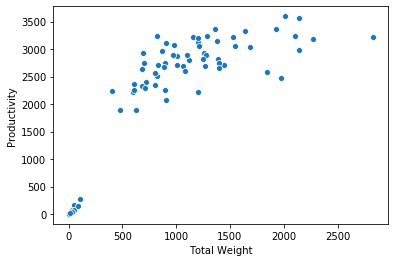

In [111]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [112]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.0,72.000000,72.000000,21.000000
mean,4706.597222,194383.097222,8.494306,16.327500,1011.472222,0.010139,0.001014,0.0,0.0,6.370972,2375.716944,12340.709524
std,236.936175,3846.121636,4.861444,14.970024,623.020741,0.006389,0.000639,0.0,0.0,13.151421,1050.820731,4464.086254
min,4296.000000,190952.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,1.400000,6392.400000
25%,4524.250000,191674.750000,6.365000,9.025000,680.750000,0.010000,0.001000,0.0,0.0,0.000000,2260.622500,9423.000000
50%,4733.500000,192524.000000,8.500000,12.125000,978.500000,0.010000,0.001000,0.0,0.0,0.000000,2711.125000,11413.400000
75%,4935.250000,200183.000000,11.325000,19.415000,1362.500000,0.010000,0.001000,0.0,0.0,4.455000,3055.880000,15261.000000
max,5048.000000,200819.000000,21.100000,81.200000,2829.000000,0.030000,0.003000,0.0,0.0,65.200000,3598.210000,20129.000000


In [113]:
#df=df[df['Productivity']>500]
#df.describe()

In [114]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [115]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
print(lm.intercept_)

1045.9614023548468


In [117]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,1.342189


In [118]:
predictions = lm.predict(X_test)

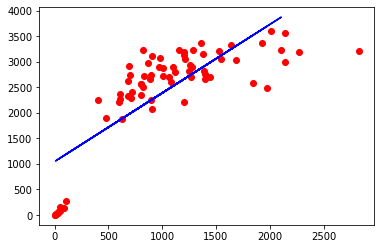

In [119]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 461.4913485387451
MSE: 334638.80161220743
RMSE: 578.4797331041144
r2_score: 0.6139692580848017


In [121]:
joblib.dump(lm,"Car.pkl")#only execute if rmse is less than half of mean of productivity

['Car.pkl']